In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# ✅ Define the LayoutGAN Model (Same as Training)
class LayoutGAN(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=128, output_dim=4):
        super(LayoutGAN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LayoutGAN().to(device)

# ✅ Load Trained Weights
model.load_state_dict(torch.load("layoutgan_resume.pth", map_location=device))
model.eval()


LayoutGAN(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)

In [2]:
def generate_resume_layout(num_sections=10):
    """
    Generates a structured resume layout.
    """
    with torch.no_grad():
        random_inputs = torch.randn(num_sections, 4).to(device)  # 4D box format (x, y, w, h)
        layout = model(random_inputs).cpu().numpy()  # Convert to NumPy array
    return layout

# ✅ Generate a Layout
generated_layout = generate_resume_layout()
print("Generated Resume Layout:\n", generated_layout)


Generated Resume Layout:
 [[-0.02525076  1.0975122   0.4780771   1.0838298 ]
 [-0.10397086  0.20208114  0.19481602  0.19003956]
 [ 0.2667685   0.3148436  -0.26797688  0.36142084]
 [ 0.6633185  -0.00851285  0.9002613  -0.1360184 ]
 [ 0.3915865   0.25171894  1.0200201   0.45058247]
 [ 0.29610837 -0.19163106  0.8697319  -0.35216936]
 [-0.10874273  0.17865898  0.14529681  0.16711502]
 [-0.093605    0.05642273  0.22172365  0.01712833]
 [ 0.42180935  0.864286    0.3215175   0.76256317]
 [ 0.18326291  0.6919904   0.28550416  0.710375  ]]


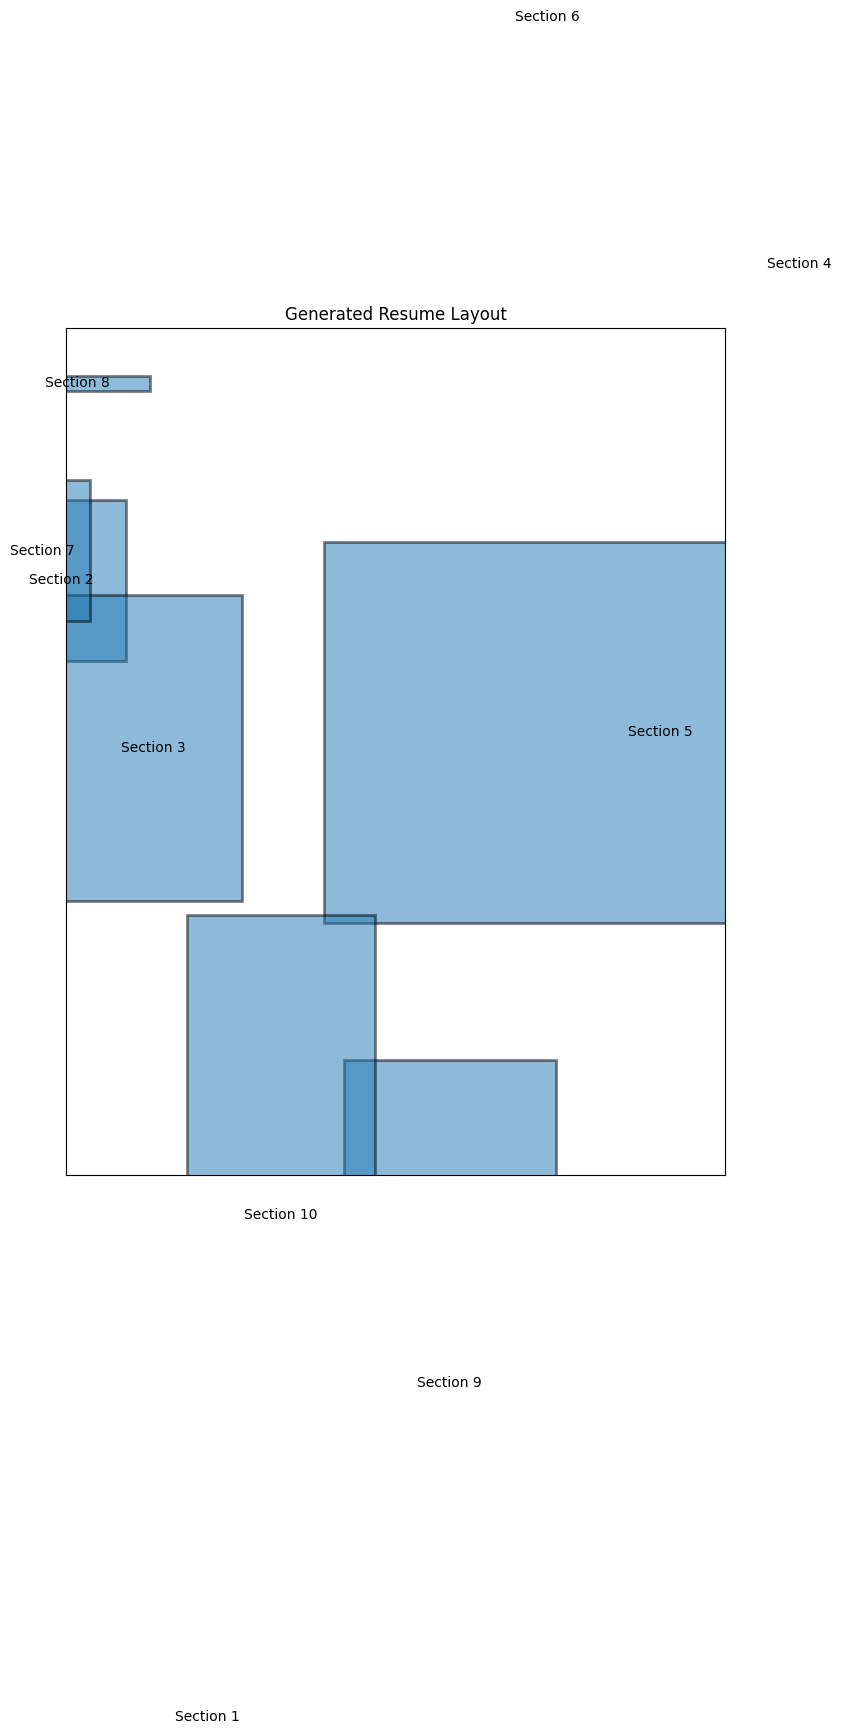

In [3]:
def plot_layout(layout):
    """
    Visualizes the generated resume layout.
    """
    fig, ax = plt.subplots(figsize=(8.5, 11))  # Standard resume page size

    for i, (x, y, w, h) in enumerate(layout):
        rect = plt.Rectangle((x, y), w, h, fill=True, edgecolor="black", linewidth=2, alpha=0.5)
        ax.add_patch(rect)
        ax.text(x + w / 2, y + h / 2, f"Section {i+1}", ha="center", va="center")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().invert_yaxis()  # Flip Y-axis to match document layout
    plt.title("Generated Resume Layout")
    plt.show()

# ✅ Visualize Layout
plot_layout(generated_layout)


In [1]:
import torch, grp, pwd, os, subprocess
devices = []
try:
	print("\n\nChecking ROCM support...")
	result = subprocess.run(['rocminfo'], stdout=subprocess.PIPE)
	cmd_str = result.stdout.decode('utf-8')
	cmd_split = cmd_str.split('Agent ')
	for part in cmd_split:
		item_single = part[0:1]
		item_double = part[0:2]
		if item_single.isnumeric() or item_double.isnumeric():
			new_split = cmd_str.split('Agent '+item_double)
			device = new_split[1].split('Marketing Name:')[0].replace('  Name:                    ', '').replace('\n','').replace('                  ','').split('Uuid:')[0].split('*******')[1]
			devices.append(device)
	if len(devices) > 0:
		print('GOOD: ROCM devices found: ', len(devices))
	else:
		print('BAD: No ROCM devices found.')

	print("Checking PyTorch...")
	x = torch.rand(5, 3)
	has_torch = False
	len_x = len(x)
	if len_x == 5:
		has_torch = True
		for i in x:
			if len(i) == 3:
				has_torch = True
			else:
				has_torch = False
	if has_torch:
		print('GOOD: PyTorch is working fine.')
	else:
		print('BAD: PyTorch is NOT working.')


	print("Checking user groups...")
	user = os.getlogin()
	groups = [g.gr_name for g in grp.getgrall() if user in g.gr_mem]
	gid = pwd.getpwnam(user).pw_gid
	groups.append(grp.getgrgid(gid).gr_name)
	if 'render' in groups and 'video' in groups:
		print('GOOD: The user', user, 'is in RENDER and VIDEO groups.')
	else:
		print('BAD: The user', user, 'is NOT in RENDER and VIDEO groups. This is necessary in order to PyTorch use HIP resources')

	if torch.cuda.is_available():
		print("GOOD: PyTorch ROCM support found.")
		t = torch.tensor([5, 5, 5], dtype=torch.int64, device='cuda')
		print('Testing PyTorch ROCM support...')
		if str(t) == "tensor([5, 5, 5], device='cuda:0')":
			print('Everything fine! You can run PyTorch code inside of: ')
			for device in devices:
				print('---> ', device)
	else:
		print("BAD: PyTorch ROCM support NOT found.")
except:
	print('Cannot find rocminfo command information. Unable to determine if AMDGPU drivers with ROCM support were installed.')



Checking ROCM support...
Cannot find rocminfo command information. Unable to determine if AMDGPU drivers with ROCM support were installed.
